In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, roc_auc_score
import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from catboost import CatBoostClassifier

In [5]:
train = pd.read_csv('train_dataset.csv')

C:\Users\Леонид\AppData\Local\Temp\ipykernel_7068\1489391292.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,821,822,825,826,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,14

In [6]:
cat_cols = [col for col in train.columns if train[col].dtype == 'object']
num_cols = [col for col in train.columns if train[col].dtype != 'object']

In [7]:
# for col in num_cols:
#     median = train[col].median(skipna=True)
#     train[col] = train[col].fillna(median)
# train[cat_cols] = train[cat_cols].fillna('')
# train[num_cols] = train[num_cols].fillna(0)
train_cat = train[cat_cols].fillna('') # .join(train[num_cols])
train = train[num_cols].fillna(0).join(train_cat)
num_cols.pop(0)
num_cols.pop(0)

'target'

In [11]:
train

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7616803.0,7616803.0,7616803.0,0.0,0.0,0.0,7616803.0,7616803.0,7616803.0,0.256261
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258682
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276902
14452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260516
14453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260005
14454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261


In [10]:
# train[cat_cols] = train[cat_cols].fillna('') # .join(train[num_cols])
# train = train[num_cols].fillna(0) # .join(train_cat)

In [77]:
# train = train.fillna(0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2312), int64(3), object(351)
memory usage: 294.0+ MB


In [9]:
train.isna().sum()

report_date    0
client_id      0
target         0
col1           0
col2           0
              ..
col2659        0
col2660        0
col2661        0
col2662        0
col2663        0
Length: 2666, dtype: int64

In [ ]:
sns.pairplot(data, hue='target')

plt.show()

In [6]:
train

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
1,2022-11-01,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7616803.0,7616803.0,7616803.0,0.0,0.0,0.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
3,2022-09-01,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258682
4,2022-08-01,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276902
14452,2022-09-01,1969,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260516
14453,2022-02-01,7116,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260005
14454,2021-08-01,7117,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261


In [79]:
del_cols = ['col1280', 'col1279', 'col1278', 'col1277', 'col1276', 'col1275', 'col1274', 'col1273', 'col1180', 'col1172','col1171', 'col1170', 'col1076', 'col188',
            'col189', 'col190', 'col191', 'col192', 'col194', 'col195'] # 'col559' del 'col192'col195 col1172

In [8]:
del_cols = ['col1280', 'col1279', 'col1278', 'col1277', 'col1276', 'col1275', 'col1274', 'col1273', 'col1180', 'col1172','col1171', 'col1170', 'col1076', 'col188',
            'col189', 'col190', 'col191', 'col192', 'col194', 'col195', 'col819', 'col820', 'col823', 'col824']

In [10]:
def remove_repetitions(first_list, second_list):
    return [element for element in first_list if element not in second_list]


cat_cols = remove_repetitions(cat_cols, del_cols)

In [29]:
train.isna().sum()

report_date        0
client_id          0
target             0
col1           14453
col2           14450
               ...  
col2659        13950
col2660         6420
col2661         6420
col2662         6420
col2663            0
Length: 2642, dtype: int64

In [14]:
train = train.sample(frac=1).reset_index(drop=True)

In [11]:
onehotencoder = OneHotEncoder(sparse_output = False)
stand_sc = StandardScaler()

data_ohe = pd.DataFrame(onehotencoder.fit_transform(train[cat_cols]))
data_num_cols = stand_sc.fit_transform(train[num_cols])
# data_num_cols = rob_sc.fit_transform(data[num_cols])
data_norm = pd.DataFrame(data_num_cols, columns=num_cols).join(data_ohe)
# y = data_norm[data_norm.columns[-1]].values
# X = data_norm[data_norm.columns[:-1]].values

y = train['target'].values
X = data_norm[data_norm.columns[:-1]].values



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=62, stratify=y)
print(np.unique(y_train), np.unique(y_test))

[0 1] [0 1]


In [25]:
print(np.unique(y_train), np.unique(y_test))

[0 1] [0 1]


In [ ]:
len(y_test)

2892

In [23]:
from catboost import cv

params = {
    'loss_function': 'Logloss',
    'iterations': 150,
    'custom_loss': 'AUC',
    'random_seed': 63,
    'learning_rate': 0.5
}

from catboost import Pool
train_pool = Pool(data=X, label=y, has_header=True)

cv_data = cv(
    params=params,
    pool=Pool(X, label=y,),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=0,
    plot=True, # Никуда без визуализатора
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.04630679916
bestIteration = 149

Training on fold [1/5]

bestTest = 0.05424513051
bestIteration = 146

Training on fold [2/5]

bestTest = 0.05838743799
bestIteration = 148

Training on fold [3/5]

bestTest = 0.04777474765
bestIteration = 143

Training on fold [4/5]

bestTest = 0.06821835575
bestIteration = 149



In [24]:
def print_cv_summary(cv_data):
    cv_data.head(10)

    best_value = cv_data['test-Logloss-mean'].min()
    best_iter = cv_data['test-Logloss-mean'].values.argmin()

    print('Best validation Logloss score : {:.4f}±{:.4f} on step {}'.format(
        best_value,
        cv_data['test-Logloss-std'][best_iter],
        best_iter)
    )
print_cv_summary(cv_data)

Best validation Logloss score : 0.0551±0.0088 on step 148


In [16]:
from catboost import Pool, EShapCalcType, EFeaturesSelectionAlgorithm

feature_names = ['F{}'.format(i) for i in range(X_train.shape[1])]
train_pool = Pool(X_train, y_train, feature_names=feature_names)
test_pool = Pool(X_test, y_test, feature_names=feature_names)

model = CatBoostClassifier(iterations=1000, random_seed=0)
summary = model.select_features(
    train_pool,
    eval_set=test_pool,
    features_for_select=feature_names,
    num_features_to_select=50,
    steps=3,
    algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=EShapCalcType.Regular,
    train_final_model=True,
    logging_level='Silent',
    plot=True
)

In [11]:
# train = train.drop(cat_cols, axis=1)
# X = data_norm.drop(['target'], axis = 1) #.fillna(0) # 'ID_LAT_LON_YEAR_WEEK', 'location',
# y = data_norm['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# CatBoostClassifier
cat = CatBoostClassifier(
    # cat_features=cat_cols,
    iterations=100,
    task_type="GPU",
    depth=10,
    # random_seed=42,
    loss_function='Logloss' #  No boosting_type='Plain', bootstrap_type='Bernoulli',
    )

cat.fit(X_train,
        y_train,
        # cat_features=cat_cols,
        verbose=False,
        plot=True,
        eval_set=(X_test, y_test)
        )


y_pred = cat.predict(X_test)

print(f'Roc Auc Score: {roc_auc_score(y_test, y_pred)}') # , squared=False

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

: 

In [ ]:
np.unique(y)

array([0., 1.])

Text(0.5, 0, 'False Positive Rate')

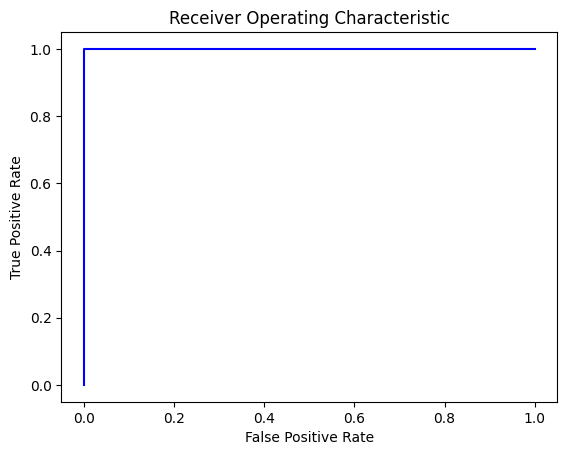

In [ ]:
probs = cat.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

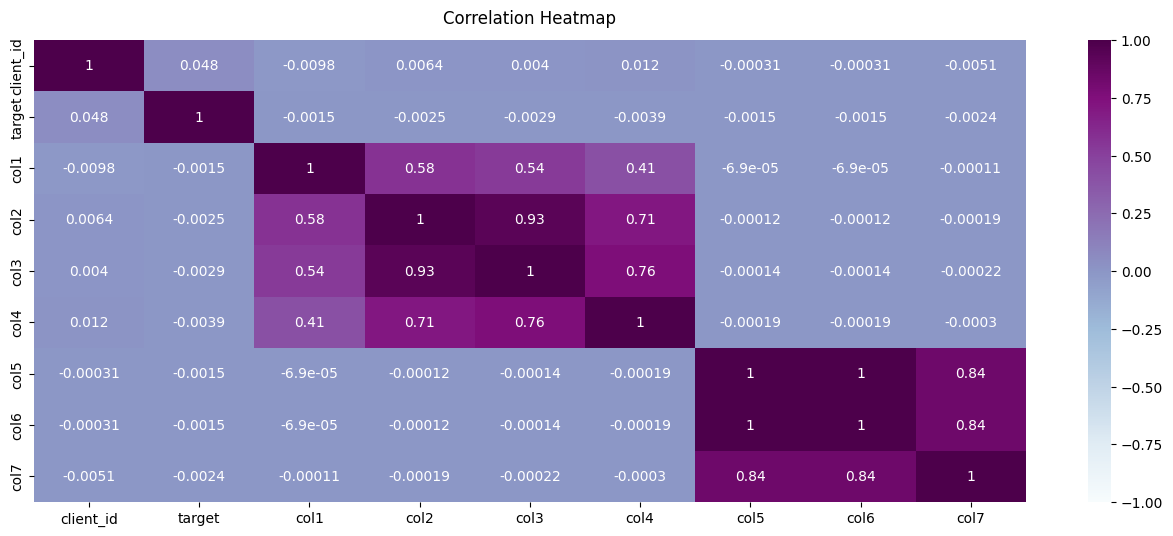

In [ ]:
corr_matrix = data.fillna(0).corr()

plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="BuPu").set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()